In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls /content/drive/MyDrive/Blackboxes

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

input_shape = (32,32,3)
num_labels = 10

def preprocess_images(images, target_shape=input_shape):
    images = images.reshape((images.shape[0], 32, 32, 3)).astype('float32') / 255.
    return images

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

train_size = train_images.shape[0]
test_size = test_images.shape[0]
batch_size = 128

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(train_size).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(test_images).shuffle(test_size).batch(batch_size)



In [4]:
filters = [32, 64, 128]
strides = [1, 1, 1]
kernel_size = [3, 3, 3]
dense_dim = [100, 50]

CNN = tf.keras.Sequential(
    [
    tf.keras.layers.InputLayer(input_shape=input_shape),
    tf.keras.layers.Conv2D(filters=filters[0], kernel_size=kernel_size[0], strides=strides[0], activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=filters[1], kernel_size=kernel_size[1], strides=strides[1], activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=filters[2], kernel_size=kernel_size[2], strides=strides[2], activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim[0], activation='relu'),
    tf.keras.layers.Dense(dense_dim[1], activation='relu'),
    tf.keras.layers.Dense(num_labels),
    ]
)

CNN.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

Epoch 1/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5189 - accuracy: 0.4433 - val_loss: 1.2333 - val_accuracy: 0.5564
Epoch 2/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.1116 - accuracy: 0.6035 - val_loss: 1.1143 - val_accuracy: 0.6057
Epoch 3/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9247 - accuracy: 0.6746 - val_loss: 0.9567 - val_accuracy: 0.6683
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8118 - accuracy: 0.7182 - val_loss: 0.9692 - val_accuracy: 0.6726
Epoch 5/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7278 - accuracy: 0.7464 - val_loss: 0.8458 - val_accuracy: 0.7018
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6563 - accuracy: 0.7694 - val_loss: 0.8514 - val_accuracy: 0.7170
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5956 - accuracy: 0.7913 - val_loss: 0.8507 - val_ac

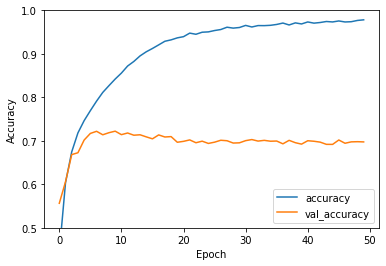

In [5]:
history = CNN.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = CNN.evaluate(test_images,  test_labels, verbose=2)

In [6]:
CNN.save('/content/drive/MyDrive/Blackboxes/CNN_black_box')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Blackboxes/CNN_black_box/assets
